In [1]:
import numpy as np
from numpy.random import multivariate_normal as Gaussian
from numpy.random import normal as norm

import matplotlib.pyplot as plt
import time

In [2]:
C = np.array([[3,2.9],[2.9,3]])
mu = np.zeros(2)

### (a)

In [3]:
S = Gaussian(mean = mu, cov = C, size = 500)

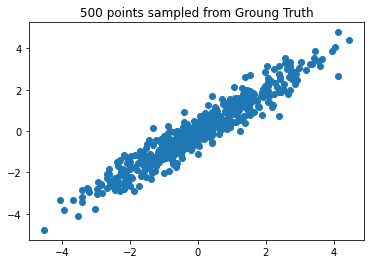

In [4]:
plt.scatter(S[:,0],S[:,1], label = 'Ground Truth')
#plt.legend()
plt.title('500 points sampled from Groung Truth')
plt.show()

### (b)

In [5]:
def Gibbs_sampling(z_0, n_iter = 100):
    mu_ = mu.copy()
    z = np.zeros(2)
    samples = [z_0]
    sigma = np.zeros(2)
    s = np.sqrt(3 - 2.9*2.9/3)
    for i in range(n_iter):
        for j in range(2):
            m = 2.9/3 * z[j] # z[j] is given
            k = (j+1)%2
            z[k] = norm(m, s)
        samples.append(z.copy())
    return np.array(samples)      

In [6]:
S_Gibbs = Gibbs_sampling(z_0 = np.array([-4,-4]), n_iter = 100)

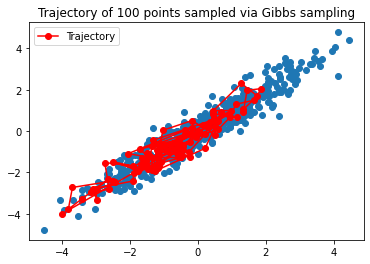

In [7]:
plt.scatter(S[:,0],S[:,1])
plt.plot(S_Gibbs[:,0],S_Gibbs[:,1], label = 'Trajectory', color = 'r', marker = 'o')
plt.legend()
plt.title('Trajectory of 100 points sampled via Gibbs sampling')
plt.show()

### (c) HMC with Leapfrog, set $\varepsilon = 0.1$ and $L = 20$

In [8]:
mu = np.zeros(2)
C = np.array([[3,2.9],[2.9,3]])
M = np.eye(2)
C_inv = np.linalg.inv(C)
M_inv = np.linalg.inv(M)

In [9]:
def U(z): # = - log(p(z))
    return 0.5 * (z-mu) @ C_inv @ (z-mu)

In [10]:
def dU(z):
    return C_inv @ (z-mu)

In [11]:
def K(r):
    return 0.5 * r @ M_inv @ r

In [12]:
H = lambda z, r: U(z) + K(r)

In [13]:
def Leapfrog(eps, z, r, dU = dU):
    r_half = r - eps * dU(z)/2
    z_new = z + eps * np.linalg.inv(M) @ r_half
    r_new = r_half - eps * dU(z_new)/2
    return z_new, r_new

In [14]:
def L_step_Leapfrog(z, r, eps, L = 20):
    r_ = r.copy()
    z_ = z.copy()
    for l in range(L):
        z_, r_ = Leapfrog(eps = eps, z = z_, r = r_)
    return z_ , r_

In [15]:
def HMC(z_0, r_pdf = Gaussian, L = 20, eps = 0.1, n_sample = 100):
    
    Sample_points = [z_0.copy()]
    
    sampled = 0
    while sampled < n_sample:
        r_0 = r_pdf(mu, M)
        z_new, r_new = L_step_Leapfrog(eps = eps, z = z_0, r = r_0)
        p = np.log(np.random.uniform())
        if p <= H(z_0, r_0) - H(z_new, -r_new):
            Sample_points.append(z_new.copy())
            z_0 = z_new
            sampled += 1
                    
    return np.array(Sample_points)

In [16]:
t = time.time()
S_HMC= HMC(z_0 = np.array([-4,-4]))
print(time.time()-t)

0.03988814353942871


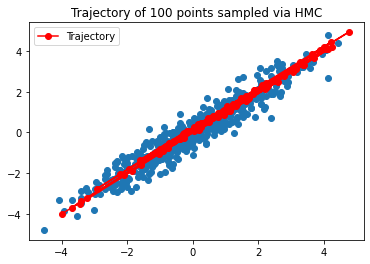

In [17]:
plt.scatter(S[:,0],S[:,1])
plt.plot(S_HMC[:,0],S_HMC[:,1], label = 'Trajectory', color = 'r', marker = 'o')
plt.legend()
plt.title('Trajectory of 100 points sampled via HMC')
plt.show()